<h1><center><font size=12>H1B Data Mining Project</font></center></h1>

# 1. INTRODUCTION TO THE CAPSTONE PROEJCT

<font size =3>The H-1B is a visa in the United States under the Immigration and Nationality Act, section 101(a)(15)(H) which allows U.S. employers to employ foreign workers in specialty occupations.(from wikipedia). It is important for international student and foreigner in the US to work on a more permenant fashion. However, a lot of job post, the ones we can find in some mainstream job posting website, do not necessarily contain this kind of information. It is a frustrating and time-consuming experience to go through the whole tedious job application and got a rejection letter immediatly after the application was sent out. This experience happens to almost every foreigns who wants to find a job, especially fresh graduates who have no experience.

# 2. MOTIVATION AND GOAL

<font size =3>The motivation of this project is to really help the foreigners and interational students to gain more insights about the companies' H1B application history. And this notebook can serve as a direction for international students when they are applying schools. Considering the fact that the companies are more prone to hire local students. Picking up a school which locates at the hottest job market can increase the chances of being hired. Besides, this notebook can be a database for job applicant to refere durin the application process. Before apply for a job, have a look at the H1B history of the certain company can help applicants allocate their time more wisely. The last purpose of this project is to develop a machine learning algorithm to help people estimate their changes of getting the H1B application. 

In summary, the goal of this project is to:
<br>
i) __a helper in university application process__
<br>
ii) __a database to go to during job hunting__
<br>
iii) __is H1B a lottery ?__

# __3. DATA EXPLORARY__

In [1]:
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import base
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor

In [2]:
data = pd.read_csv('h1b_kaggle.csv')
data.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


<font size=5>Let us have a look at the salary information of the H1B application cases

In [3]:
salaryCol = data.PREVAILING_WAGE
print("the 98 percentile of the salary is %.1fk dollar"%(np.nanpercentile(salaryCol,98)/1000.0))
print("the 2 percentile of the salary is %.1fk dollar"%(np.nanpercentile(salaryCol,2)/1000.0))
print("the median of the salary is %.1fk dollar"%(salaryCol.median()/1000.0))

the 98 percentile of the salary is 139.0k dollar
the 2 percentile of the salary is 34.0k dollar
the median of the salary is 65.0k dollar


<font size=5>Exclude the outliers and plot the histogram of the salary distribution. And perform some data visulization of the salary

Text(0,0.5,'Number of Applications')

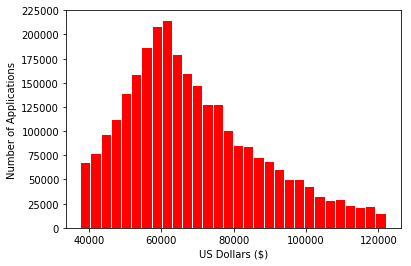

In [4]:
warnings.filterwarnings("ignore")
salaryCol[salaryCol <= np.nanpercentile(salaryCol,2)]= np.nan
salaryCol[salaryCol >= np.nanpercentile(salaryCol,98)]= np.nan
salaryCol.dropna()
plt.hist(salaryCol, 30, range=[np.nanpercentile(salaryCol,2), np.nanpercentile(salaryCol,98)], \
                               rwidth = 0.9, histtype = 'bar', facecolor = 'red', align = 'mid');
plt.xlabel('US Dollars ($)')
plt.ylabel('Number of Applications')

<font size=3>From the wages histgram, the most common salary for H1B application cases are 60k dollars, there is a long tail of 
distribution as observed. We can have a closer look at the salary distribution per year as shown in the violin plot to gain more information about the correlation between the salary and the year.

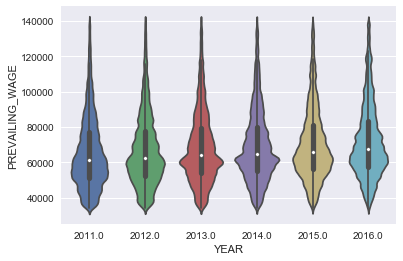

In [6]:
ax = sns.violinplot(x="YEAR", y="PREVAILING_WAGE", data = data)

It turns out that the wavges distribution does not have a strong dependent on the year. But the medium of the salary shift higher from 2011 to 2016.

It is a natural question to ask who are the top employers hiring foreigh labors. To answer this question, we count the application records and sort them in descending order. Let us take a look at the first five employers.

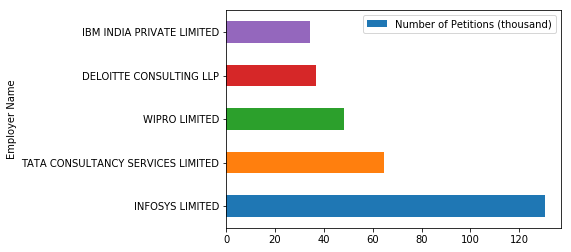

In [5]:
employer_name = data['EMPLOYER_NAME'].value_counts().index.tolist();
employer_petitions = data['EMPLOYER_NAME'].value_counts().tolist();
employer_petitions_thousand = [x / 1000 for x in employer_petitions];
pd.DataFrame({'Employer Name':employer_name[:5], \
              'Number of Petitions (thousand)':employer_petitions_thousand[:5]})\
             .plot.barh(x = 'Employer Name', y ='Number of Petitions (thousand)', rot = 0)

Interestingly, 4 out of 5 employers are india-based companies. It will be interesting to divide applications based on the origin of the company, such as where was the company formed. It might be an interesting thing to look at, but we need to use other databases to look up for such information.

Different people choose different workplace based on different factors. Some people are fond of the weather, some people are city person and some people enjoy the high-pay, fast-pace life. So let us have a look at the top five cities, foreigners would like to work in.

In [13]:
df_top10_worksite = data.groupby(['WORKSITE'], sort=False).size().nlargest(10).reset_index(name='TOP10')
df_top10_worksite

,WORKSITE,TOP10
0,"NEW YORK, NEW YORK",191719
1,"HOUSTON, TEXAS",83889
2,"SAN FRANCISCO, CALIFORNIA",62787
3,"ATLANTA, GEORGIA",52193
4,"CHICAGO, ILLINOIS",51497
5,"SAN JOSE, CALIFORNIA",50083
6,"SUNNYVALE, CALIFORNIA",35136
7,"DALLAS, TEXAS",31628
8,"BOSTON, MASSACHUSETTS",31471
9,"REDMOND, WASHINGTON",30667


The most popular city is NYC, and is followed by Houston and San Francisco. Although Los Angeles is the second largest city in the US, it does not make it to the top 10 foreigner hiring cities. But New York, Chicago and Houston end up top 5. Let us divid deeper into these 10 cities and plot their base salary distribution on the violin plot.

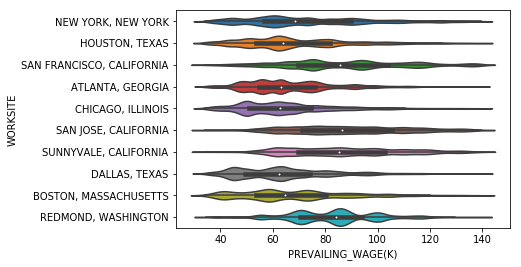

In [14]:
i = 0
df_temp = df_top10_worksite
for worksite in df_temp['WORKSITE']:
    if i == 0: df_temp = data[data['WORKSITE']==worksite]
    if i > 0: df_temp = pd.concat([df_temp,data[data['WORKSITE']==worksite]])
    i += 1
df_temp['PREVAILING_WAGE(K)'] = df_temp['PREVAILING_WAGE'] / 1000.0
ax_top10_worksite = sns.violinplot(x = "PREVAILING_WAGE(K)", y = "WORKSITE", data = df_temp)
#ax_top5_worksite.set_xticklabels(['50K','60K','70K','80K','90K','100K','110K'])

From the plot we can see that, the cities in California tend to offer a higher base salary probably to battle with the high rent and living cost. Although New York does not seems to have a less intense housing situation, the base salary in New York is not higher than California cities. And REDMOND Washington is another high-salary city, probably due to Microsoft and other IT companies in greater seattle area.

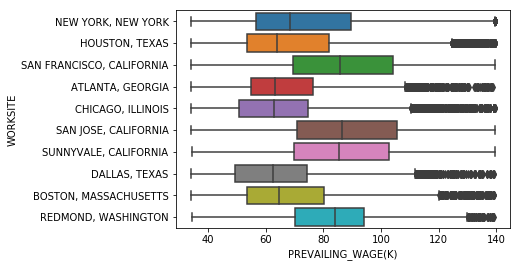

In [16]:
ax_top10_worksite_boxplot = sns.boxplot(x = "PREVAILING_WAGE(K)", y = "WORKSITE", data = df_temp)

By looking at the salary information at the top 10 popular working cities for foreigners in the US. It implies that IT related jobs and IT jobs location tends to have a higher base salary. So why do not we have a look at the top 10 job titles in the database to have a feeling about the hottest trend in the job market. Is it also IT related jobs?

In [17]:
df_top10_jobTitle = data.groupby(['JOB_TITLE'], sort=False).size().nlargest(10).reset_index(name='top10')
df_top10_jobTitle

,JOB_TITLE,top10
0,PROGRAMMER ANALYST,249038
1,SOFTWARE ENGINEER,121307
2,COMPUTER PROGRAMMER,70570
3,SYSTEMS ANALYST,61965
4,SOFTWARE DEVELOPER,42907
5,BUSINESS ANALYST,39681
6,COMPUTER SYSTEMS ANALYST,35086
7,TECHNOLOGY LEAD - US,28350
8,SENIOR SOFTWARE ENGINEER,27133
9,TECHNOLOGY ANALYST - US,26055


Amazing the top 10 jobs are almost occupied by computer and data. By checking the salary, it turns out that software engineer has a good career path and median salary is much higher than the other occupations.

In [21]:
i = 0
df_temp_jobs = df_top10_jobTitle
for job in df_temp_jobs['JOB_TITLE']:
    if i == 0: df_temp_jobs = data[data['JOB_TITLE'] == job]
    if i > 0: df_temp_jobs = pd.concat([df_temp_jobs, data[data['JOB_TITLE'] == job]])
    i += 1
    
df_temp_jobs['PREVAILING_WAGE(K)'] = df_temp_jobs['PREVAILING_WAGE']/1000.0

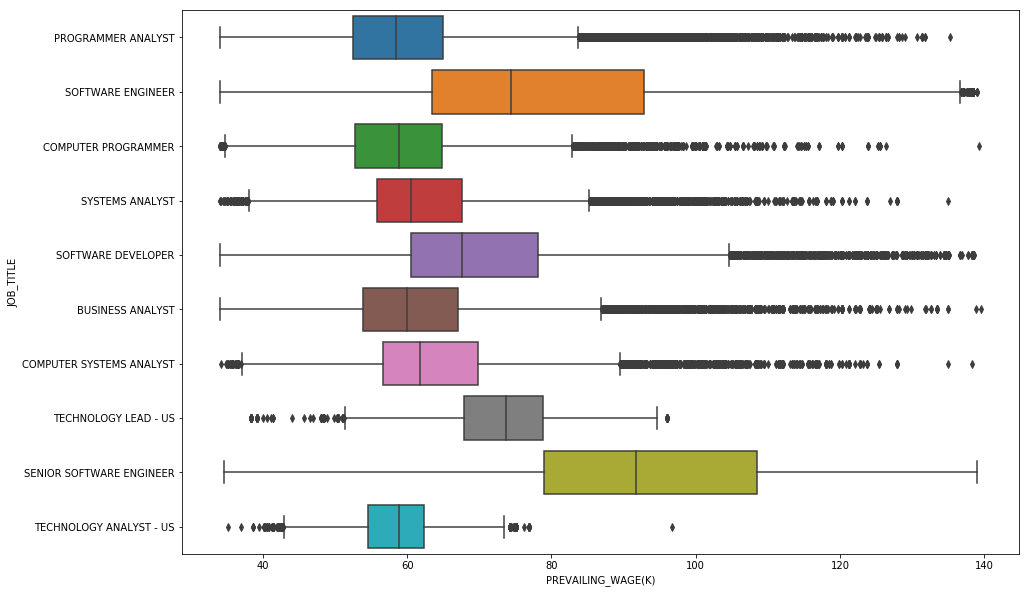

In [22]:
a4_dims = (15, 10)
fig, ax = plt.subplots(figsize= a4_dims)
ax_top10_jobTitle_boxplot = sns.boxplot(x = "PREVAILING_WAGE(K)", y = "JOB_TITLE", data = df_temp_jobs, ax = ax)

An overview of all the figures we have shown before, it can be made as an interactive plot.
Play around a little bit.

In [23]:
import pandas as pd
import numpy as np

from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.palettes import Spectral6
from ipywidgets import interact
import requests

In [27]:
data_part = data.sample(n = 1000)
data_part["PREVAILING_WAGE(K)"] = data_part["PREVAILING_WAGE"] / 1000.0
def topNSalary(col= 'WORKSITE', topN = 5):
    df_temp = data_part.groupby([col], sort=False).size().nlargest(topN).reset_index(name='topN')
    i = 0
    for ele in df_temp[col]:
        if i == 0: df_temp = data_part[data_part[col] == ele]
        if i > 0: df_temp = pd.concat([df_temp, data_part[data_part[col] == ele]])
        i += 1
    a_dims = (15, 10)
    fig, ax = plt.subplots(figsize= a_dims) 
    ax.set_xlabel('Prevailing Wages', size = 20)
    ax.set_ylabel(col, size = 20)
    ax.tick_params(direction='out', length = 12, width = 4, colors='b',
                   grid_color='r', grid_alpha = 0.5, labelsize = 16)
    sns.violinplot(x = "PREVAILING_WAGE(K)", y = col, data = df_temp, ax = ax)

In [28]:
interact(topNSalary, col=['WORKSITE', 'JOB_TITLE', 'EMPLOYER_NAME', 'SOC_NAME'], topN = (0, 20))

interactive(children=(Dropdown(description='col', options=('WORKSITE', 'JOB_TITLE', 'EMPLOYER_NAME', 'SOC_NAME'), value='WORKSITE'), IntSlider(value=5, description='topN', max=20), Output()), _dom_classes=('widget-interact',))

<function __main__.topNSalary(col='WORKSITE', topN=5)>

# __4.Machine Learning To Predict The OutCome of H1B Application__

Before we proceed to make a predictor to predict the H1B application result, it is important to have a look at the dataset and make some simplification before we proceed to the machine learning algorithm. There are seven outcomes of a H1B visa application: certified-withdrawn, withdrawn, certified, denied, rejected, invalidated, pending quality and compliance review. It is a multiclass classification. The number of each class is shown below as bar chart. We can see that there is much more number of application being approvded than all the other classes combined. 

In [29]:
data['CASE_STATUS'].unique()

array(['CERTIFIED-WITHDRAWN', 'WITHDRAWN', 'CERTIFIED', 'DENIED',
       'REJECTED', 'INVALIDATED',
       'PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED', nan],
      dtype=object)

CERTIFIED                                             2615623
CERTIFIED-WITHDRAWN                                    202659
DENIED                                                  94346
WITHDRAWN                                               89799
PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED         15
REJECTED                                                    2
INVALIDATED                                                 1
Name: CASE_STATUS, dtype: int64


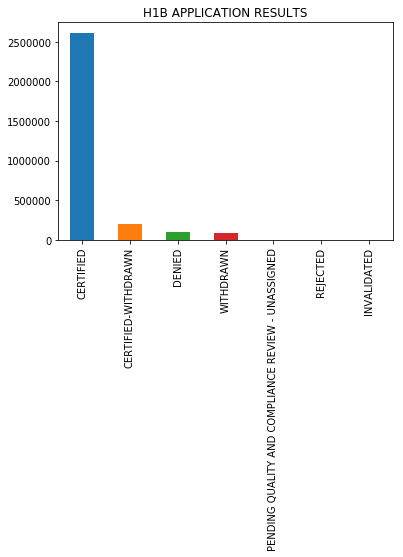

In [30]:
data_outcome = data[data['CASE_STATUS'].notnull()]
print(data_outcome['CASE_STATUS'].value_counts())
data_outcome['CASE_STATUS'].value_counts().plot(kind='bar', title='H1B APPLICATION RESULTS')

In [31]:
df = data.copy()

By looking at the total number of H1B applications fall into the seven categories. We have a dominant 'certified' class. All the other classes have a smaller value compared with the 'certified' class. In order to make our life easier and not jeopadize the effect of the classifier, we divided the seven outcomes of the application into to categories: certificed and denied. 

<font size=5>Now divide the visa application result into two categories, certified and denied

In [32]:
warnings.filterwarnings("ignore")

df.CASE_STATUS[df['CASE_STATUS']=='WITHDRAWN'] = 'DENIED'
df.CASE_STATUS[df['CASE_STATUS']=='REJECTED'] = 'DENIED'
df.CASE_STATUS[df['CASE_STATUS']=='INVALIDATED'] = 'DENIED'
df.CASE_STATUS[df['CASE_STATUS']=='PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED'] = 'DENIED'
df.CASE_STATUS[df['CASE_STATUS']=='CERTIFIED-WITHDRAWN'] = 'CERTIFIED'

CERTIFIED    2818282
DENIED        184163
Name: CASE_STATUS, dtype: int64


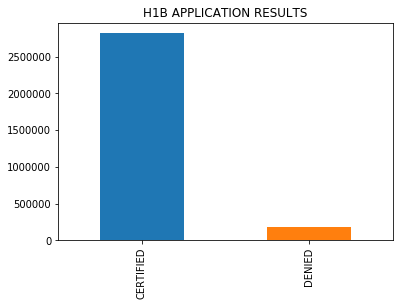

In [33]:
## Storing non null in df w.r.t. case status
df = df[df['CASE_STATUS'].notnull()]
print(df['CASE_STATUS'].value_counts())
df['CASE_STATUS'].value_counts().plot(kind='bar', title='H1B APPLICATION RESULTS')

The certified cases take 94% of the total applications, and 6% of the applications are denied. it is a really unbalanced dataset which introduces extra challenges in performing machine learning algorithms.

It is a good practice to do data cleaning before the data is fed to the machine learning algorithm. We are going to do some fundmental thing, such as looking for NAN in the data and removing them

In [34]:
##check count of NAN
count_of_nan = len(df) - df.count()
print('the number of nan in each column is: ' , count_of_nan)

the number of nan in each column is:  Unnamed: 0                 0
CASE_STATUS                0
EMPLOYER_NAME             46
SOC_NAME               17721
JOB_TITLE                 30
FULL_TIME_POSITION         2
PREVAILING_WAGE       118993
YEAR                       0
WORKSITE                   0
lon                   107242
lat                   107242
dtype: int64


In [35]:
df = df[df['CASE_STATUS'].notnull()]
df = df[df['EMPLOYER_NAME'].notnull()]
df = df[df['SOC_NAME'].notnull()]
df = df[df['JOB_TITLE'].notnull()]
df = df[df['FULL_TIME_POSITION'].notnull()]
df = df[df['PREVAILING_WAGE'].notnull()]
# Dropping lat and lon columns
if 'lat' in df:
    df = df.drop('lat', axis = 1)
if 'lon' in df:
    df = df.drop('lon', axis = 1)
count_of_nan = len(df) - df.count()
print('the number of nan in each column is: ' , count_of_nan)

the number of nan in each column is:  Unnamed: 0            0
CASE_STATUS           0
EMPLOYER_NAME         0
SOC_NAME              0
JOB_TITLE             0
FULL_TIME_POSITION    0
PREVAILING_WAGE       0
YEAR                  0
WORKSITE              0
dtype: int64


In [37]:
Employe_name_list = df['EMPLOYER_NAME'].unique()
len(Employe_name_list)

219130

There are 219130 different employers in the database. Namely, 219130 features associatd with the name of the employer. It is too much information for an algorithm to handle and have a large chance of introducing overfitting. In order to start simple, the employer has been naively divided into two categories, based on the prior information: __University-based employer__ and __industry-based employer or non-universitg-based employer__. So a new feature whether the employ is a university or not is derived from the employer information column

In [38]:
df['WHETHER_EMPLOYER_UNIVERSITY'] = np.nan

In [40]:
# to sepearte the data into academia job and not academia job
warnings.filterwarnings("ignore")
df['EMPLOYER_NAME'] = df['EMPLOYER_NAME'].str.lower()
df.WHETHER_EMPLOYER_UNIVERSITY[df['EMPLOYER_NAME'].str.contains('university')] = 'university'
df.WHETHER_EMPLOYER_UNIVERSITY[df['EMPLOYER_NAME'].str.contains('college')] = 'university'
df['WHETHER_EMPLOYER_UNIVERSITY'] = df['WHETHER_EMPLOYER_UNIVERSITY'].replace(np.nan, 'not a university', regex=True)

In [41]:
soc_list = df['SOC_NAME'].unique()
len(soc_list)

1918

The same argument holds for the SOC names. SOC names is a assembly of the job types. There are total of 1918 types of jobs. To prevent overfitting, it has been divided into two categories: __CS jobs__ and __NON-CS jobs__. 

In [42]:
df['WHETHER_CS'] = np.nan

In [43]:
# to sepearte the data into CS job and not CS job
warnings.filterwarnings("ignore")
df['SOC_NAME'] = df['SOC_NAME'].str.lower()
df.WHETHER_CS[df['SOC_NAME'].str.contains('computer')] = 'CS'
df.WHETHER_CS[df['SOC_NAME'].str.contains('software')] = 'CS'
df.WHETHER_CS[df['SOC_NAME'].str.contains('data')] = 'CS'
df.WHETHER_CS[df['SOC_NAME'].str.contains('programmer')] = 'CS'
df.WHETHER_CS[df['SOC_NAME'].str.contains('developer')] = 'CS'
df.WHETHER_CS[df['SOC_NAME'].str.contains('web')] = 'CS'
df['WHETHER_CS'] = df['WHETHER_CS'].replace(np.nan, 'not a CS job')

The location of the application is another feature/vairable provided in the dataset. Considering the fact that all the H1B application in the same satet will be processed at the same H1B application processing center, there is no need to keep such a detailed geolocation. So the city information has been discarded and only the state information is kept.

In [44]:
## Splitting city and state and capturing state in another variable
df['state'] = df.WORKSITE.str.split(',').str[-1].str.lstrip()
df = df[df.state != 'NA']

In [46]:
df.dtypes

Unnamed: 0                       int64
CASE_STATUS                     object
EMPLOYER_NAME                   object
SOC_NAME                        object
JOB_TITLE                       object
FULL_TIME_POSITION              object
PREVAILING_WAGE                float64
YEAR                           float64
WORKSITE                        object
WHETHER_EMPLOYER_UNIVERSITY     object
WHETHER_CS                      object
state                           object
dtype: object

In [152]:
df1 = df.copy()
for col in ['CASE_STATUS', 'WHETHER_CS', 'FULL_TIME_POSITION', 'YEAR', 'WHETHER_EMPLOYER_UNIVERSITY', 'state']:
    df1[col] = df1[col].astype('category')

In [153]:
df1.dtypes

Unnamed: 0                        int64
CASE_STATUS                    category
EMPLOYER_NAME                    object
SOC_NAME                         object
JOB_TITLE                        object
FULL_TIME_POSITION             category
PREVAILING_WAGE                 float64
YEAR                           category
WORKSITE                         object
WHETHER_EMPLOYER_UNIVERSITY    category
WHETHER_CS                     category
state                          category
dtype: object

After doing some feature engineering, two new columns are introduced into the dataset: Whether CS (whether the occupation is Computer Science related job), and Whether_emploer_university (whether the employer is a university or research institute) based on prior knowledge.
<br>
And it is the time to validate our intuition and prior knowlege to see whether such a feature extraction makes sense.__New York__, __California__ and __Texas__ are the top three job providers for the foreigners in both academia and the industry. Although these three states offer more or less the same academia jobs, when it comes to the industry-based job opportunities California outnumbers the other ones significantly.

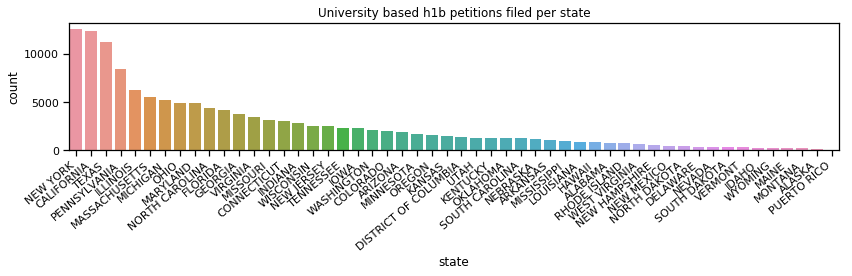

In [154]:
#h1b applied vs year
df1_temp = df1[df1.WHETHER_EMPLOYER_UNIVERSITY == 'university']
sns.set_context("notebook",font_scale= 1.0)

plt.figure(figsize=(12,4))
plt.title('University based h1b petitions filed per state')
ax_temp = sns.countplot(x = 'state',
              data = df1_temp,
              order = df1_temp['state'].value_counts().index)
ax_temp.set_xticklabels(ax_temp.get_xticklabels(), rotation= 40, ha="right")
plt.tight_layout()
plt.show()

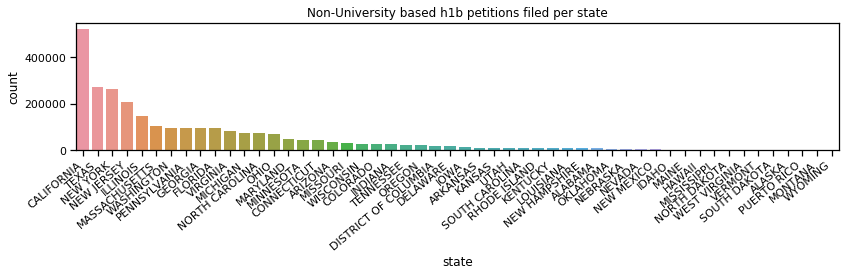

In [155]:
plt.figure(figsize=(12,4))
df1_temp1 = df1[df1.WHETHER_EMPLOYER_UNIVERSITY == 'not a university']
plt.title('Non-University based h1b petitions filed per state')
ax_temp1 = sns.countplot(x = 'state',
              data = df1_temp1 ,
              order = df1_temp1 ['state'].value_counts().index)
ax_temp1.set_xticklabels(ax_temp1.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

Although from the violin plot in the previous session shows that the salary distribution for each years stay the same. But it turns out the more and more job opportunities are created for foreigners from 2012 to 2016.

__Total number of job applications throughout the 2011-2016 period__

In [156]:
from scipy.optimize import curve_fit
NumberJobs_Year = df1[['WHETHER_CS','YEAR']]
NumberJobs = NumberJobs_Year.groupby('YEAR').size()
print(NumberJobs)

YEAR
2011.0    331162
2012.0    391651
2013.0    421129
2014.0    496234
2015.0    598471
2016.0    625155
dtype: int64


__Total number of Computer Science job applications throughout the 2011-2016 period__

In [157]:
NumberofCSJobs_Year = NumberJobs_Year[NumberJobs_Year.WHETHER_CS == 'CS']
NumberOfCSJobs_In_Each_Year = NumberofCSJobs_Year.groupby('YEAR').size()
print(NumberOfCSJobs_In_Each_Year)

YEAR
2011.0    177756
2012.0    232930
2013.0    272932
2014.0    333498
2015.0    422460
2016.0    442868
dtype: int64


__Total number of other majors except Computer Science job applications throughout the 2011-2016 period__

In [158]:
NumberofNONCSJobs_Year = NumberJobs_Year[NumberJobs_Year.WHETHER_CS == 'not a CS job']
NumberOfNONCSJobs_In_Each_Year = NumberofNONCSJobs_Year.groupby('YEAR').size()
print(NumberOfNONCSJobs_In_Each_Year)

YEAR
2011.0    153406
2012.0    158721
2013.0    148197
2014.0    162736
2015.0    176011
2016.0    182287
dtype: int64


__The CS related jobs see a almost linear increase every year, however the job from the other categories does not have such an increase speed__. By simply extrapolating the original dataset and assuming the trend of application keeps, we got the estimated 2017 number of H1B applications.

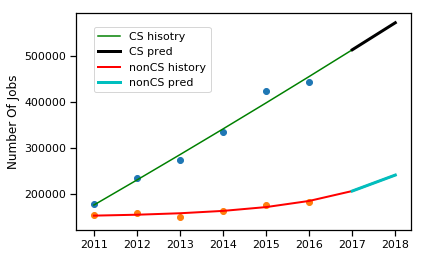

In [159]:
def plotfittedcurve_CS (df):
    from scipy.optimize import curve_fit
    def func(x, a, b, c):
        return a * np.exp(-b * x) + c
    year = np.array([0,1,2,3,4,5])
    NumberJobs = np.array(df)
    popt, pcov = curve_fit(func, year, NumberJobs)

    yearPred = np.array([0,1,2,3,4,5,6,7])
    p1, = plt.plot(yearPred, func(yearPred, *popt), 'g-', label = 'CS hisotry')
    plt.scatter(year, NumberJobs)

    yearPred1 = np.array([6,7])
    p2, = plt.plot(yearPred1, func(yearPred1, *popt), 'k-', linewidth = 3.0, label = 'CS pred')

    my_xticks = ['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']
    plt.xticks(year, my_xticks)
    plt.xticks(yearPred, my_xticks)
    plt.ylabel('Number Of Jobs')
    plt.legend(handles = [p1, p2])
    
    #line_up, = plt.plot([1,2,3], label='Line 2')
    #line_down, = plt.plot([3,2,1], label='Line 1')
    #plt.legend(handles=[line_up, line_down])
    
    
def plotfittedcurve_nonCS (df):
    from scipy.optimize import curve_fit
    def func(x, a, b, c):
        return a * np.exp(-b * x) + c
    year = np.array([0,1,2,3,4,5])
    NumberJobs = np.array(df)
    popt, pcov = curve_fit(func, year, NumberJobs)

    yearPred = np.array([0,1,2,3,4,5,6,7])
    p1, = plt.plot(yearPred, func(yearPred, *popt), 'r-', label='nonCS history', linewidth = 2.0)
    plt.scatter(year, NumberJobs)

    yearPred1 = np.array([6,7])
    p2, = plt.plot(yearPred1, func(yearPred1, *popt), 'c-', label = 'nonCS pred', linewidth = 3.0)

    my_xticks = ['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']
    plt.xticks(year, my_xticks)
    plt.xticks(yearPred, my_xticks)
    plt.ylabel('Number Of Jobs')
    plt.legend(handles = [p1, p2])
    plt.legend(bbox_to_anchor=(0.45, 0.85),
           bbox_transform=plt.gcf().transFigure)
    
plotfittedcurve_CS(NumberOfCSJobs_In_Each_Year)
plotfittedcurve_nonCS(NumberOfNONCSJobs_In_Each_Year)

In [160]:
df1.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,WHETHER_EMPLOYER_UNIVERSITY,WHETHER_CS,state
0,1,CERTIFIED,university of michigan,biochemists and biophysicists,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",university,not a CS job,MICHIGAN
6,7,CERTIFIED,bt and mk energy and commodities,chief executives,CHIEF OPERATING OFFICER,Y,91021.0,2016.0,"HOUSTON, TEXAS",not a university,not a CS job,TEXAS
8,9,CERTIFIED,esi companies inc.,chief executives,PRESIDENT,Y,127546.0,2016.0,"MEMPHIS, TEXAS",not a university,not a CS job,TEXAS
14,15,CERTIFIED,newmont mining corporation,chief executives,BOARD MEMBER,Y,105914.0,2016.0,"GREENWOOD VILLAGE, COLORADO",not a university,not a CS job,COLORADO
16,17,CERTIFIED,cardiac science corporation,financial managers,VICE PRESIDENT OF FINANCE,Y,90834.0,2016.0,"WAUKESHA, WISCONSIN",not a university,not a CS job,WISCONSIN


We observe that except for the prevailing wage and year, all the other features are strings. In order to to resampling in the following steps, it is a good idea to use number to replace string in each features. We can start by creating such mapping relations

In [161]:
stateList = df1.state.unique().tolist()
indexState = [i for i in range(len(stateList))]
class_mapping_state = dict(zip(stateList, indexState))
df1["state"] = df1["state"].map(class_mapping_state)

yearList = df1.YEAR.unique().tolist()
indexYear = [i for i in range(len(yearList))] 
class_mapping_year = dict(zip(yearList, indexYear))
df1["YEAR"] = df1["YEAR"].map(class_mapping_year)

class_mapping_casestatus = {'CERTIFIED' : 0, 'DENIED' : 1}
df1["CASE_STATUS"] = df1["CASE_STATUS"].map(class_mapping_casestatus)

class_mapping_university = {'university' : 0, 'not a university' : 1}
df1["WHETHER_EMPLOYER_UNIVERSITY"] = df1["WHETHER_EMPLOYER_UNIVERSITY"].map(class_mapping_university)

class_mapping_cs = {'CS' : 0, 'not a CS job' : 1}
df1["WHETHER_CS"] = df1["WHETHER_CS"].map(class_mapping_cs)

class_mapping_fulltime = {'Y' : 0, 'N' : 1}
df1["FULL_TIME_POSITION"] = df1["FULL_TIME_POSITION"].map(class_mapping_fulltime)

In [162]:
df1 = df1[df1['CASE_STATUS'].notnull()]
df1 = df1[df1['WHETHER_EMPLOYER_UNIVERSITY'].notnull()]
df1 = df1[df1['WHETHER_CS'].notnull()]
df1 = df1[df1['FULL_TIME_POSITION'].notnull()]
df1 = df1[df1['PREVAILING_WAGE'].notnull()]
df1 = df1[df1['state'].notnull()]

In [163]:
count_of_nan_df1 = len(df1) - df1.count()
print('the number of nan in each column is: ' , count_of_nan_df1)

the number of nan in each column is:  Unnamed: 0                     0
CASE_STATUS                    0
EMPLOYER_NAME                  0
SOC_NAME                       0
JOB_TITLE                      0
FULL_TIME_POSITION             0
PREVAILING_WAGE                0
YEAR                           0
WORKSITE                       0
WHETHER_EMPLOYER_UNIVERSITY    0
WHETHER_CS                     0
state                          0
dtype: int64


__Let us starts from a subset of the original dataset to perform some classification__. And call the random sampled subset df2, datafram 2.

In [204]:
warnings.filterwarnings("ignore")
from sklearn import preprocessing
dimension = df1.shape
print("the total number of valid records in the dataset is %d"%dimension[0])
nsamples = min(500000, dimension[0])
simple_random_sampling = np.random.randint(0, dimension[0], nsamples)
df2 = df1.ix[simple_random_sampling]

the total number of valid records in the dataset is 2863802


Seperate the features and the outcome of the dataset and name them as __inputX__ and __labels__ accordingly.

In [205]:
df2 = df2.dropna()
df2.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,WHETHER_EMPLOYER_UNIVERSITY,WHETHER_CS,state
1795573,1795574.0,0.0,"dst brokerage solutions, llc","software developers, applications",SOFTWARE ENGINEER,0.0,72654.0,3.0,"KANSAS CITY, MISSOURI",1.0,0.0,20.0
1098318,1098319.0,0.0,administrative office of the courts,computer network support specialists,SYSTEM SUPPORT ANALYST - TESTER,0.0,55869.0,1.0,"OLYMPIA, WASHINGTON",1.0,0.0,18.0
2113091,2113092.0,0.0,"24/7 media, inc.","software developers, systems software",QA ENGINEER,0.0,86050.0,3.0,"NEW YORK, NEW YORK",1.0,0.0,10.0
183670,183671.0,0.0,infosys limited,computer systems analyst,CONSULTANT - US - PRACTITIONER,0.0,82014.0,0.0,"PLYMOUTH, MICHIGAN",1.0,0.0,0.0
2350634,2350635.0,0.0,deloitte consulting llp,financial analysts,SENIOR CONSULTANT,0.0,63440.0,4.0,"OAK CREEK, WISCONSIN",1.0,1.0,3.0


In [206]:
inputX = pd.DataFrame({'FULL_TIME_POSITION':df2.FULL_TIME_POSITION.values.astype(int),\
                       'PREVAILING_WAGE':df2.PREVAILING_WAGE.values.astype(float), \
                       'YEAR':df2.YEAR.values.astype(int),\
                       'WHETHER_EMPLOYER_UNIVERSITY':df2.WHETHER_EMPLOYER_UNIVERSITY.values.astype(int), \
                       'WHETHER_CS':df2.WHETHER_CS.values.astype(int),\
                       'state':df2.state.values.astype(int)})

labels = pd.Series(df2.CASE_STATUS.values.astype(int))

In [207]:
inputX[['FULL_TIME_POSITION', 'YEAR','WHETHER_EMPLOYER_UNIVERSITY','WHETHER_CS','state']] = \
                                inputX[['FULL_TIME_POSITION', 'YEAR','WHETHER_EMPLOYER_UNIVERSITY','WHETHER_CS','state']].\
                                                                               apply(lambda x: x.astype('category'))
labels = labels.astype('category')

In [208]:
inputX_encode = pd.get_dummies(inputX)
inputX_encode_values = inputX_encode.as_matrix()
labels_values = labels.as_matrix()

In [209]:
from sklearn.model_selection import train_test_split
X_trainB, X_testB, y_trainB, y_testB = \
        train_test_split(inputX_encode_values, labels_values, test_size = 0.2, random_state = 42)

In [210]:
import xgboost
gbm  = xgboost.XGBClassifier(max_depth=3,
                             n_estimators=500, 
                             gamma = 0, 
                             learning_rate = 0.01)

In [211]:
fit_before = gbm.fit(X_trainB, y_trainB)

In [212]:
y_predB = gbm.predict(X_testB)

In [213]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_testB, y_predB))

[[90236     0]
 [ 5276     0]]


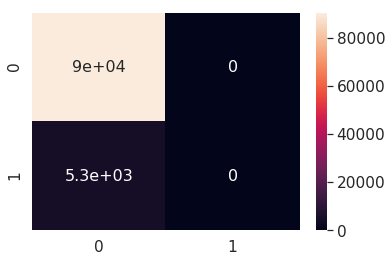

In [214]:
#plt.figure(figsize = (10,7))
df_cm = pd.DataFrame(confusion_matrix(y_testB, y_predB), range(2), range(2))
sns.set(font_scale = 1.4)#for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16})# font size

It turns out that the true positive is zero in the above case, the denied case cannot be captured at all
which implies that it is necessary to try resampling the input data before trying 

In [227]:
inputX.head()

,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WHETHER_EMPLOYER_UNIVERSITY,WHETHER_CS,state
0,0,72654.0,3,1,0,20
1,0,55869.0,1,1,0,18
2,0,86050.0,3,1,0,10
3,0,82014.0,0,1,0,0
4,0,63440.0,4,1,1,3


In [226]:
inputX_encode.head()
variable_list = []

,PREVAILING_WAGE,FULL_TIME_POSITION_0,FULL_TIME_POSITION_1,YEAR_0,YEAR_1,YEAR_2,YEAR_3,YEAR_4,YEAR_5,WHETHER_EMPLOYER_UNIVERSITY_0,...,state_42,state_43,state_44,state_45,state_46,state_47,state_48,state_49,state_50,state_51
0,72654.0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,55869.0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,86050.0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,82014.0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,63440.0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [243]:
salaryList = ['wage']
positonList = ['full_time', 'part_time']
yearList = ['2011', '2012', '2013', '2014', '2015', '2016']
universityList = ['university', 'industry']
csjobList = ['cs', 'not_cs']
stateList = list(class_mapping_state.keys())

In [244]:
import itertools
totalNameList = list(itertools.chain(salaryList, positonList, yearList,\
                                     universityList, csjobList, stateList))

In [245]:
featureList = list(gbm.feature_importances_)

In [246]:
feature_importanceDic = dict(zip(totalNameList, featureList))
feature_importanceDic_sorted = sorted(feature_importanceDic, \
                                      key = feature_importanceDic.get,\
                                      reverse = True)

In [247]:
feature_importanceDic_sorted

['wage',
 '2016',
 '2015',
 'cs',
 'full_time',
 'university',
 'LOUISIANA',
 'TEXAS',
 'FLORIDA',
 '2014',
 '2012',
 'CALIFORNIA',
 'WISCONSIN',
 'WASHINGTON',
 'NEVADA',
 '2011',
 'UTAH',
 'MONTANA',
 'NEW JERSEY',
 'COLORADO',
 'INDIANA',
 'PENNSYLVANIA',
 'part_time',
 '2013',
 'industry',
 'not_cs',
 'MICHIGAN',
 'ILLINOIS',
 'RHODE ISLAND',
 'OHIO',
 'GEORGIA',
 'NEW YORK',
 'MARYLAND',
 'NORTH CAROLINA',
 'VIRGINIA',
 'MASSACHUSETTS',
 'DISTRICT OF COLUMBIA',
 'MISSOURI',
 'MISSISSIPPI',
 'MINNESOTA',
 'TENNESSEE',
 'ARKANSAS',
 'KENTUCKY',
 'PUERTO RICO',
 'ARIZONA',
 'HAWAII',
 'ALASKA',
 'SOUTH CAROLINA',
 'WYOMING',
 'IOWA',
 'KANSAS',
 'OREGON',
 'CONNECTICUT',
 'IDAHO',
 'NEBRASKA',
 'NEW MEXICO',
 'OKLAHOMA',
 'WEST VIRGINIA',
 'DELAWARE',
 'SOUTH DAKOTA',
 'NORTH DAKOTA',
 'MAINE',
 'ALABAMA',
 'VERMONT',
 'NEW HAMPSHIRE']

SMOTE (Synthetic Minority Oversampling TEchnique)

In [248]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio = 'auto')
X_sm, y_sm = smote.fit_sample(inputX_encode_values, labels_values)

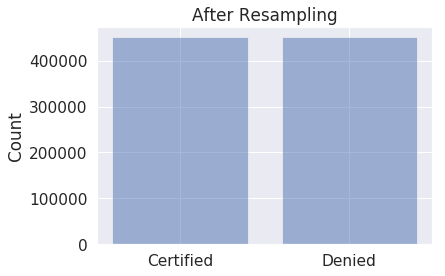

In [249]:
objects = ('Certified', 'Denied')
y_pos = np.arange(len(objects))
performance = [(y_sm == 0).sum(), (y_sm == 1).sum()]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Count')
plt.title('After Resampling')
 
plt.show()

### LASSO FEATURE SELECTION

Split the resampled dataset into training set and test set

In [251]:
X_trainA, X_testA, y_trainA, y_testA = \
                train_test_split(X_sm, y_sm, test_size = 0.2, random_state = 42)

Perform lasso feature selection on the training set and see which feature can be removed

In [304]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_trainA)
X_trainA_scale = scaler.transform(X_trainA)

In [253]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X_trainA_scale, y_trainA)
model = SelectFromModel(lsvc, prefit=True)

In [254]:
X_trainA_scale_new = model.transform(X_trainA_scale)

In [299]:
indexs = [i for i in range(len(list(lsvc.coef_[0] == 0))) if list(lsvc.coef_[0] == 0)[i] == True]
indexs

[6, 28]

In [301]:
removedFeature = []
for index in indexs:
    removedFeature.append(totalNameList[index])
removedFeature

['2014', 'VIRGINIA']

It turns out that the zero coefficient feature just some sub feature generated by one hot encoding. The other year and location still play roles in the classification, so no feature is removed from the input dataset

In [261]:
import xgboost
gbm_search = xgboost.XGBClassifier(max_depth=3)

In [269]:
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [10, 100, 1000]},
              {'learning_rate': [0.01, 0.1, 0.5]}]

In [270]:
grid_search = GridSearchCV(estimator = gbm_search, param_grid = parameters, scoring='recall', cv = 3)

In [271]:
nsamples_search = 1000
simple_random_sampling_search = np.random.randint(0, X_trainA.shape[0], nsamples)
search_sampleX = X_trainA[simple_random_sampling_search]
search_sampleY = y_trainA[simple_random_sampling_search]

In [272]:
grid_search.fit(search_sampleX,search_sampleY)

GridSearchCV(cv=3, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [10, 100, 1000]}, {'learning_rate': [0.01, 0.1, 0.5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [273]:
warnings.filterwarnings("ignore")

grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [274]:
gbmA  = grid_search.best_estimator_
fit_after = gbmA.fit(X_trainA, y_trainA)

In [275]:
pred_y_after = gbmA.predict(X_testA)

In [276]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_testA, pred_y_after))

[[89286   823]
 [25218 65112]]


In [277]:
confusion_matrix_A = confusion_matrix(y_testA, pred_y_after)
precision = confusion_matrix_A[1][1]/float(confusion_matrix_A[1][1] + confusion_matrix_A[0][1])
recall = confusion_matrix_A[1][1]/float(confusion_matrix_A[1][0] + confusion_matrix_A[1][1])
Specificity = confusion_matrix_A[0][0]/float(confusion_matrix_A[0][0] + confusion_matrix_A[0][1])
FPRate = confusion_matrix_A[0][1]/float(confusion_matrix_A[0][1] + confusion_matrix_A[0][0])
print("precision is %f"%precision)
print("recall is %f"%recall)
print("specificity is %f"%Specificity)
print("False Positive Rate is %f"%FPRate)
gbmA.feature_importances_

precision is 0.987518
recall is 0.720824
specificity is 0.990867
False Positive Rate is 0.009133


array([0.4081127 , 0.02306859, 0.        , 0.0238427 , 0.02647469,
       0.02121071, 0.02337823, 0.01764979, 0.03127419, 0.02353306,
       0.        , 0.06641895, 0.        , 0.00696702, 0.01238582,
       0.00634773, 0.00712185, 0.01532745, 0.0082056 , 0.0102183 ,
       0.00727667, 0.00696702, 0.0102183 , 0.01517263, 0.00650255,
       0.00758631, 0.00356092, 0.0082056 , 0.00774114, 0.00619291,
       0.00928936, 0.0068122 , 0.0068122 , 0.00572844, 0.00356092,
       0.0047995 , 0.00712185, 0.00572844, 0.00588326, 0.00572844,
       0.00619291, 0.00418021, 0.00712185, 0.00387057, 0.01641121,
       0.00294163, 0.00510915, 0.00278681, 0.0054188 , 0.00464468,
       0.00665738, 0.00619291, 0.00510915, 0.00743149, 0.00433504,
       0.00510915, 0.00294163, 0.00758631, 0.00495433, 0.00247716,
       0.00325128, 0.00418021, 0.0034061 , 0.00402539, 0.00123858],
      dtype=float32)

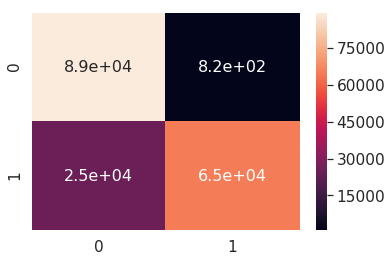

In [278]:
#plt.figure(figsize = (10,7))
df_cm = pd.DataFrame(confusion_matrix(y_testA, pred_y_after), range(2), range(2))
sns.set(font_scale = 1.4)#for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16})# font size

Note: Confusion Matrix after performing resampling, 0 means the application has been accepted and 1 means the application has been rejcted, the row is the ground truth and the column is the prediction.

In [279]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp


fpr, tpr, _ = roc_curve(y_testA, pred_y_after)
roc_auc = auc(fpr, tpr)

Automatically created module for IPython interactive environment


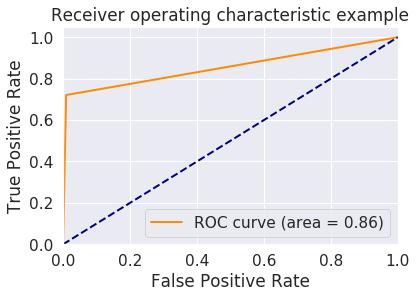

In [280]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

__The ROC curve of the gradient boosting tree method, and the AUC is around 0.86__.

In [284]:
featureListA = list(gbmA.feature_importances_)
featureListA

[0.4081127,
 0.023068586,
 0.0,
 0.0238427,
 0.026474686,
 0.021210713,
 0.023378232,
 0.01764979,
 0.031274192,
 0.023533056,
 0.0,
 0.06641895,
 0.0,
 0.0069670225,
 0.012385818,
 0.0063477317,
 0.0071218456,
 0.01532745,
 0.008205605,
 0.0102183,
 0.007276668,
 0.0069670225,
 0.0102183,
 0.015172628,
 0.0065025548,
 0.007586314,
 0.0035609228,
 0.008205605,
 0.0077411365,
 0.006192909,
 0.009289363,
 0.0068122,
 0.0068122,
 0.005728441,
 0.0035609228,
 0.0047995048,
 0.0071218456,
 0.005728441,
 0.005883264,
 0.005728441,
 0.006192909,
 0.0041802134,
 0.0071218456,
 0.0038705682,
 0.01641121,
 0.002941632,
 0.00510915,
 0.002786809,
 0.0054187956,
 0.0046446817,
 0.0066573774,
 0.006192909,
 0.00510915,
 0.007431491,
 0.0043350365,
 0.00510915,
 0.002941632,
 0.007586314,
 0.0049543274,
 0.0024771637,
 0.0032512774,
 0.0041802134,
 0.0034061,
 0.004025391,
 0.0012385818]

In [282]:
feature_importanceDicA = dict(zip(totalNameList, featureListA))
feature_importanceDic_sortedA = sorted(feature_importanceDicA, \
                                      key = feature_importanceDicA.get,\
                                      reverse = True)

In [283]:
feature_importanceDic_sortedA.

['wage',
 'cs',
 '2016',
 '2012',
 '2011',
 'university',
 '2014',
 'full_time',
 '2013',
 '2015',
 'NEW JERSEY',
 'CALIFORNIA',
 'NEW YORK',
 'TEXAS',
 'FLORIDA',
 'GEORGIA',
 'MASSACHUSETTS',
 'ILLINOIS',
 'NORTH CAROLINA',
 'VIRGINIA',
 'MARYLAND',
 'DELAWARE',
 'NEBRASKA',
 'RHODE ISLAND',
 'WISCONSIN',
 'PENNSYLVANIA',
 'ARIZONA',
 'MICHIGAN',
 'OHIO',
 'WASHINGTON',
 'DISTRICT OF COLUMBIA',
 'OREGON',
 'INDIANA',
 'COLORADO',
 'LOUISIANA',
 'KENTUCKY',
 'CONNECTICUT',
 'TENNESSEE',
 'MISSOURI',
 'MINNESOTA',
 'ARKANSAS',
 'IOWA',
 'SOUTH CAROLINA',
 'IDAHO',
 'OKLAHOMA',
 'SOUTH DAKOTA',
 'UTAH',
 'KANSAS',
 'NEW MEXICO',
 'PUERTO RICO',
 'ALABAMA',
 'NEW HAMPSHIRE',
 'HAWAII',
 'NEVADA',
 'MISSISSIPPI',
 'VERMONT',
 'MAINE',
 'ALASKA',
 'WEST VIRGINIA',
 'WYOMING',
 'NORTH DAKOTA',
 'MONTANA',
 'part_time',
 'industry',
 'not_cs']

From the analysis above, we see that wage is the dominate factor in determining the appliation success rate of a H1B application. And the second important factor location whether the job is related to computer science.

# __5.Summary__

In summary,:
<br>
i) For imbalanced dataset, resampling is an essencial step. Before and after the resampling step, there is significant different in the AUC and recall.
<br>
ii) Accuracy is not a good metric for imbalanced dataset. Using AUC instead.
<br>
iii) It turns out that the predictor has high precision and fair accuracy of the recall. But it may have some considerable false negative rate (actually the case is declined but could not predict), arond 30%.
iV) Without doing any feature extraction, all the input features can reach a number up to tens of thousands if all the occupation and employer are considered. It is a good input for the neural network. By trying different model, we can have a better undertanding about the problem.
V) the data at hand is still limited. Probably scrap some most up to date data can be the next step to go.